# Covid19 and Vaccines

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Uk analysis

##### Importing&Cleaning data

In [120]:
country = pd.read_csv('./country_wise_latest.csv')
clean = pd.read_csv('./covid_19_clean_complete.csv')
daywise = pd.read_csv('./day_wise.csv')
grouped = pd.read_csv('./full_grouped.csv')

In [33]:
grouped.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0
1,2020-01-22,Albania,0,0,0,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0,0,0,0
4,2020-01-22,Angola,0,0,0,0,0,0,0


In [20]:
clean.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [113]:
clean['Date'] = pd.to_datetime(clean['Date'])
date_range = (clean['Date'].min(), clean['Date'].max())
date_range

(Timestamp('2020-01-22 00:00:00'), Timestamp('2020-07-27 00:00:00'))

Data we have is from the 22nd of Jan 2020 to 27th July 2020

In [106]:
grouped.drop(['WHO Region'], axis=1, inplace=True)
grouped.rename(columns={'Country/Region':'Country'},inplace=True)

In [107]:
grouped.head(1)

,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0


In [108]:
uk_data = grouped[grouped['Country'] == 'United Kingdom']
uk_data.head(1)

,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
177,2020-01-22,United Kingdom,0,0,0,0,0,0,0


##### Plotting 

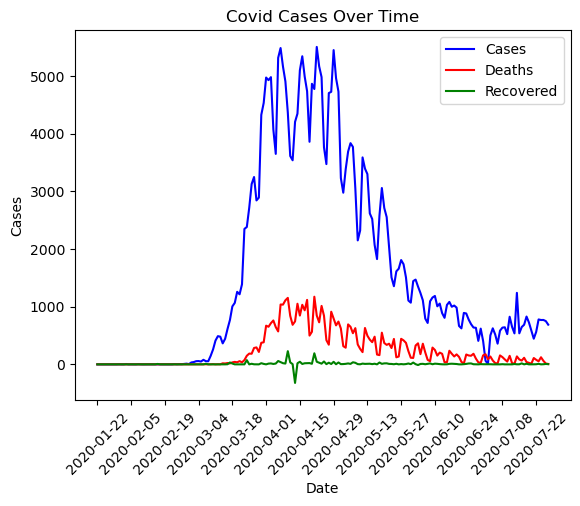

In [110]:
plt.plot(uk_data['Date'], uk_data['New cases'], color='b', label='Cases')
plt.plot(uk_data['Date'], uk_data['New deaths'], color='r', label='Deaths')
plt.plot(uk_data['Date'], uk_data['New recovered'], color='g', label='Recovered')

plt.xticks(uk_data['Date'][::14], rotation=45)

plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('Covid Cases Over Time')

plt.legend()

In [121]:
uk_clean = clean[clean['Country/Region'] == 'United Kingdom']

In [122]:
uk_clean['Province/State'].nunique()

10

In [123]:
pivot_table = uk_clean.pivot_table(index='Date', columns='Province/State', values='Active')

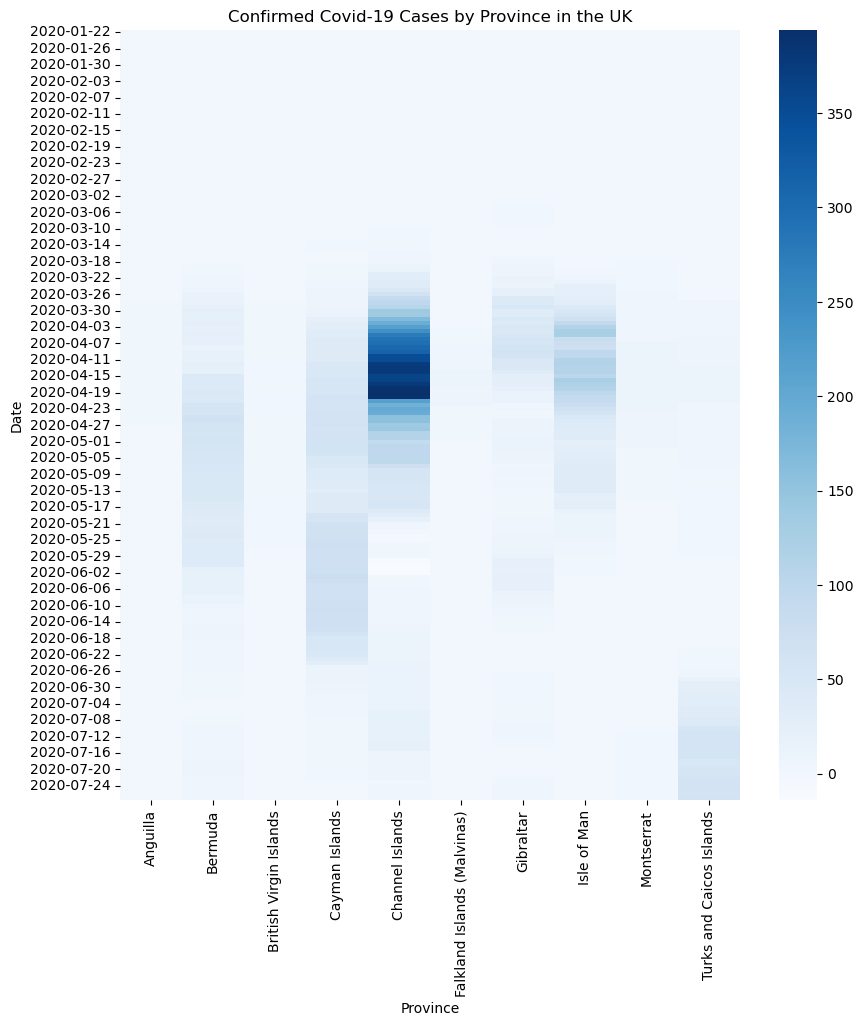

In [124]:
plt.figure(figsize=(10,10))
sns.heatmap(pivot_table, cmap='Blues')
plt.xlabel('Province')
plt.ylabel('Date')
plt.title('Confirmed Covid-19 Cases by Province in the UK')
plt.show()

##### Experimenting with new data 

In [238]:
WHO_covid = pd.read_csv('./WHO-COVID-19-global-data.csv')
owid_covid = pd.read_csv('./owid-covid-data.csv')

In [170]:
uk_covid = WHO_covid[WHO_covid['Country'] == 'The United Kingdom']

In [171]:
uk_covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
237586,2020-01-03,GB,The United Kingdom,EURO,0,0,0,0
237587,2020-01-04,GB,The United Kingdom,EURO,0,0,0,0
237588,2020-01-05,GB,The United Kingdom,EURO,0,0,0,0
237589,2020-01-06,GB,The United Kingdom,EURO,0,0,0,0
237590,2020-01-07,GB,The United Kingdom,EURO,0,0,0,0


In [233]:
owid_covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [173]:
owid_covid['date'] = pd.to_datetime(owid_covid['date'])
date_range = (owid_covid['date'].min(), owid_covid['date'].max())
date_range

(Timestamp('2020-01-01 00:00:00'), Timestamp('2023-02-01 00:00:00'))

In [174]:
columns = owid_covid.columns

In [175]:
uk_covid_owid = owid_covid[owid_covid['location'] == 'United Kingdom']

In [176]:
columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [177]:
columns_needed = ['location', 'date', 'new_cases', 'new_deaths', 'new_vaccinations']
columns_drop = [i for i in columns if i not in columns_needed]
uk_covid_owid.drop(columns_drop, axis=1, inplace=True)

/var/folders/hr/pj455s1574168yqv8wdtjqg80000gq/T/ipykernel_24391/319752499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_covid_owid.drop(columns_drop, axis=1, inplace=True)


In [179]:
uk_covid_owid.head()

,location,date,new_cases,new_deaths,new_vaccinations
238012,United Kingdom,2020-01-30,NaN,1.0,NaN
238013,United Kingdom,2020-01-31,2.0,0.0,NaN
238014,United Kingdom,2020-02-01,0.0,0.0,NaN
238015,United Kingdom,2020-02-02,0.0,1.0,NaN
238016,United Kingdom,2020-02-03,6.0,0.0,NaN


##### Plotting

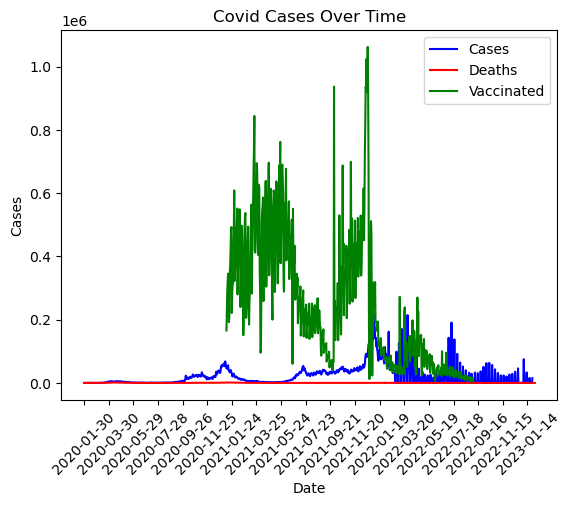

In [186]:
plt.plot(uk_covid_owid['date'], uk_covid_owid['new_cases'], color='b', label='Cases')
plt.plot(uk_covid_owid['date'], uk_covid_owid['new_deaths'], color='r', label='Deaths')
plt.plot(uk_covid_owid['date'], uk_covid_owid['new_vaccinations'], color='g', label='Vaccinated')

plt.xticks(uk_covid_owid['date'][::60], rotation=45)

plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('Covid Cases Over Time')

plt.legend()

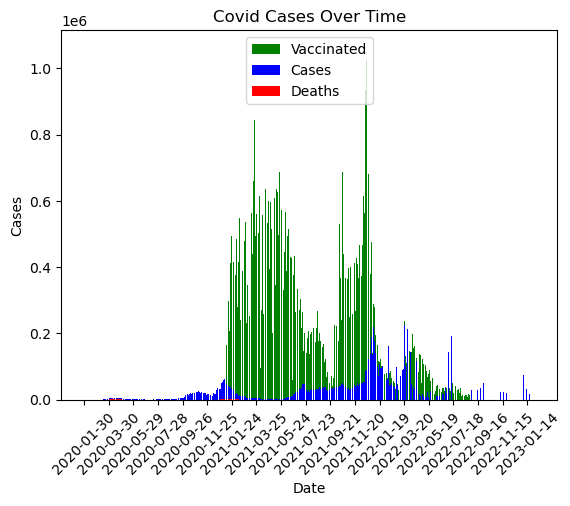

In [273]:
plt.bar(uk_covid_owid['date'], uk_covid_owid['new_vaccinations'], color='g', label='Vaccinated')
plt.bar(uk_covid_owid['date'], uk_covid_owid['new_cases'], color='b', label='Cases')
plt.bar(uk_covid_owid['date'], uk_covid_owid['new_deaths'], color='r', label='Deaths')

plt.xticks(uk_covid_owid['date'][::60], rotation=45)

plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('Covid Cases Over Time')

plt.legend()

## Global analyse

In [267]:
owid_clean = pd.read_csv('./owid-covid-data.csv')

In [268]:
owid_clean['date'] = pd.to_datetime(owid_clean['date'])
date_range = (owid_clean['date'].min(), owid_clean['date'].max())
date_range

(Timestamp('2020-01-01 00:00:00'), Timestamp('2023-02-01 00:00:00'))

In [269]:
columns = owid_clean.columns
columns_needed = ['location', 'date', 'new_cases', 'new_deaths', 'new_vaccinations', 'total_cases']
columns_drop = [i for i in columns if i not in columns_needed]
owid_clean.drop(columns_drop, axis=1, inplace=True)

In [270]:
locations = owid_clean[owid_clean['total_cases']>20000000]['location'].unique()
locations

array(['Asia', 'Brazil', 'Europe', 'European Union', 'France', 'Germany',
       'High income', 'India', 'Italy', 'Japan', 'Lower middle income',
       'North America', 'Russia', 'South America', 'South Korea',
       'United Kingdom', 'United States', 'Upper middle income', 'World'],
      dtype=object)

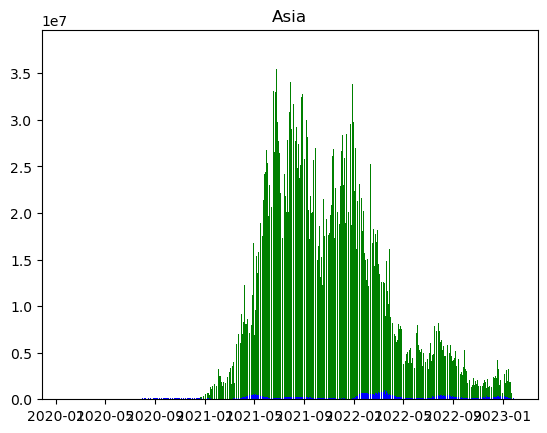

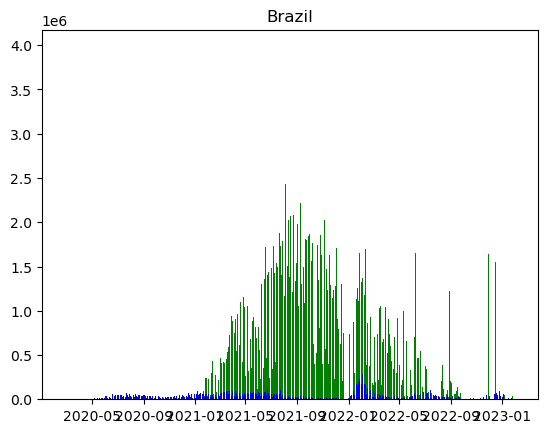

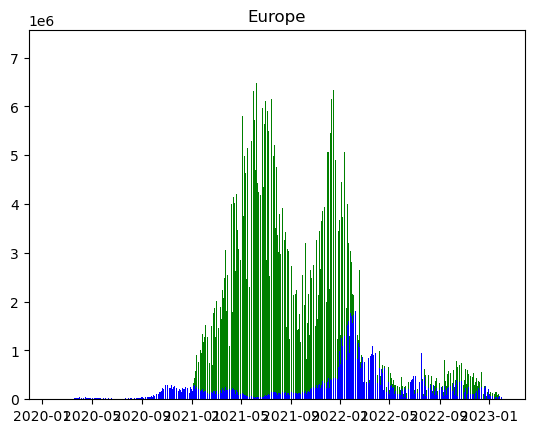

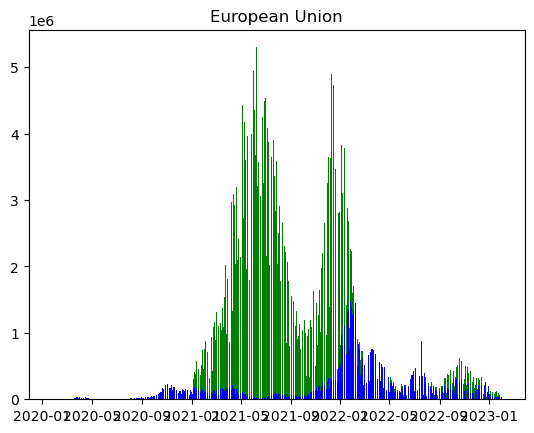

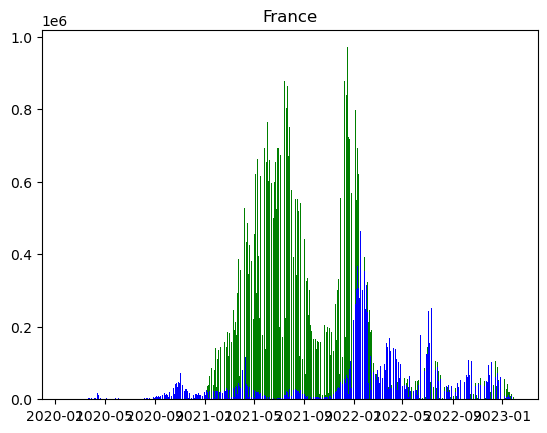

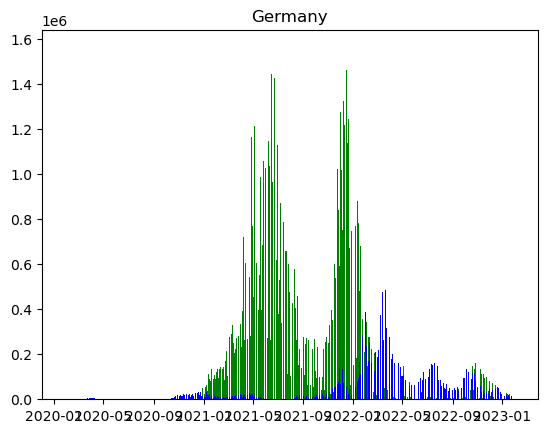

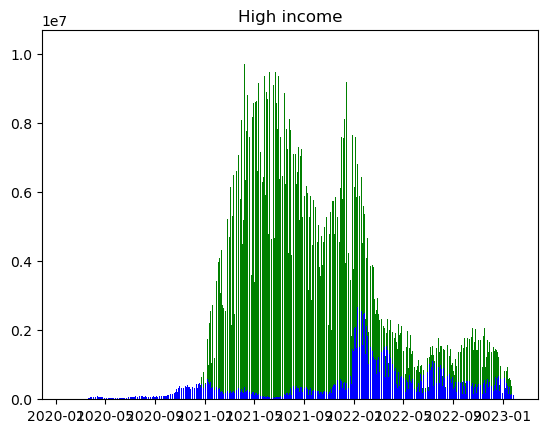

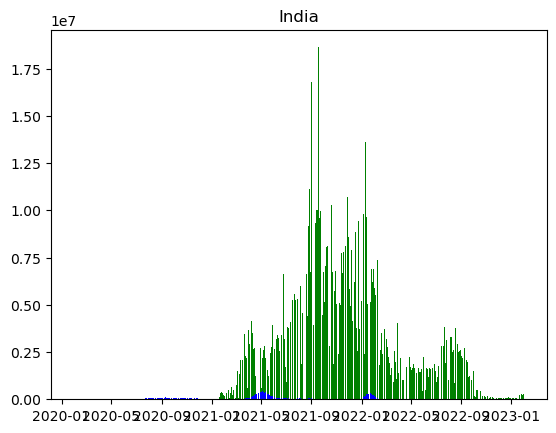

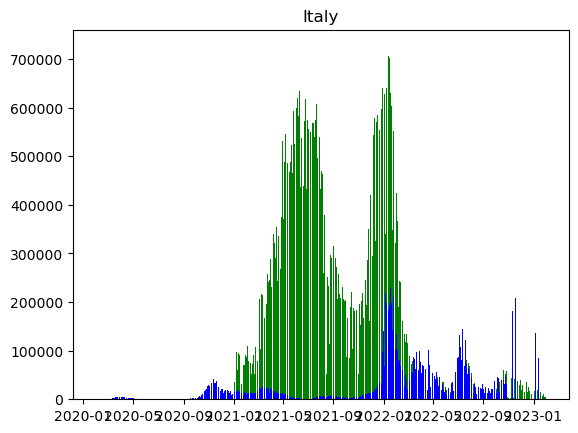

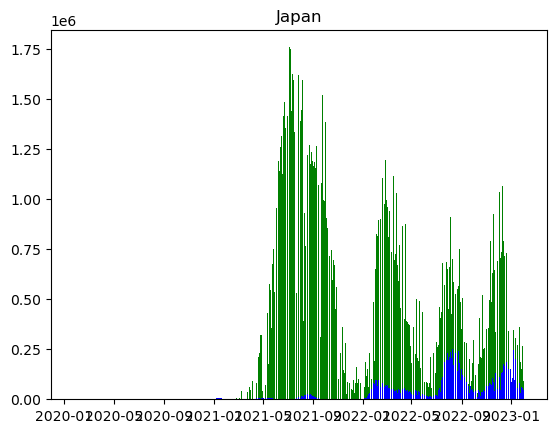

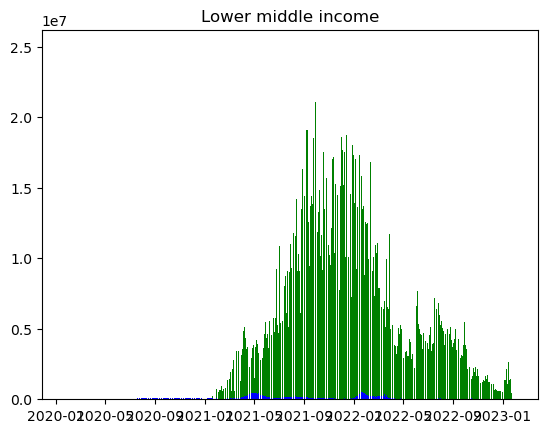

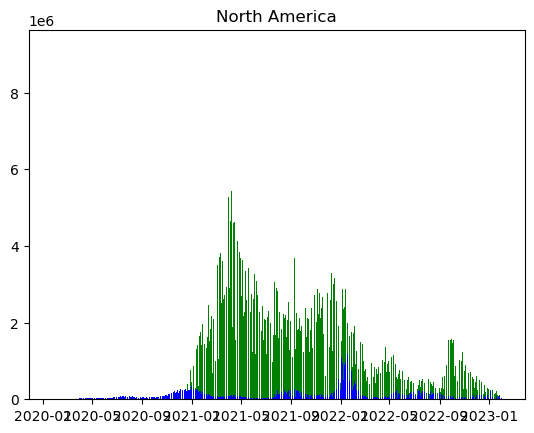

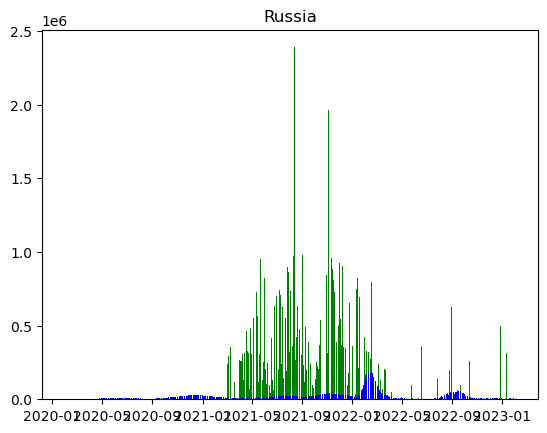

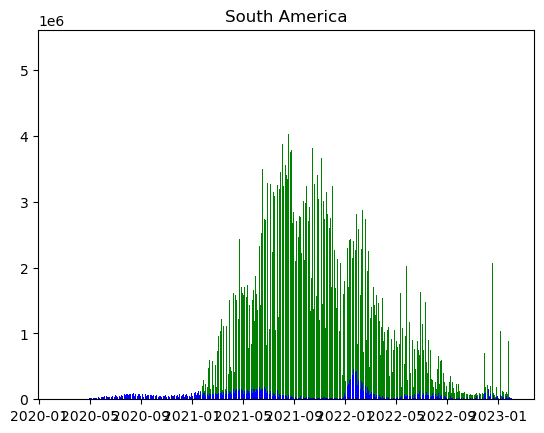

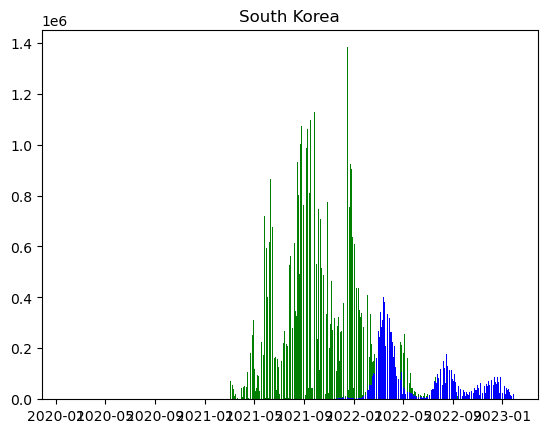

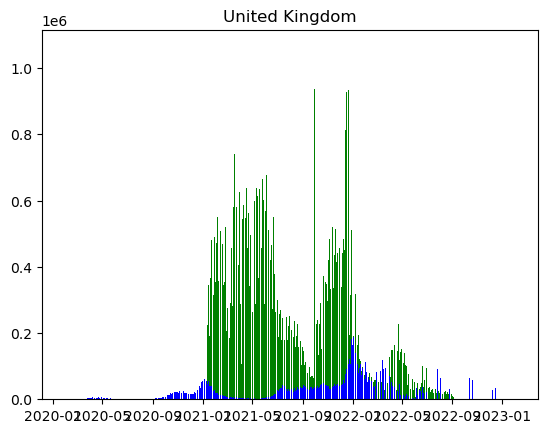

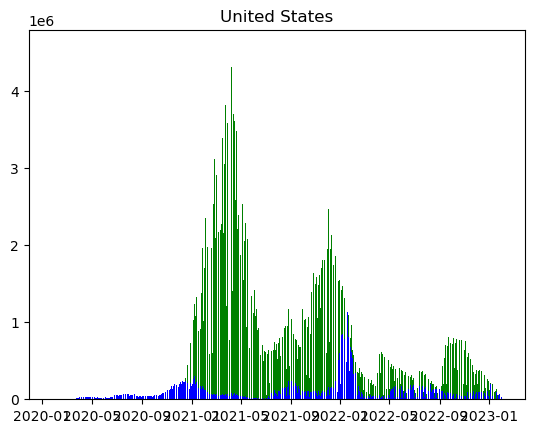

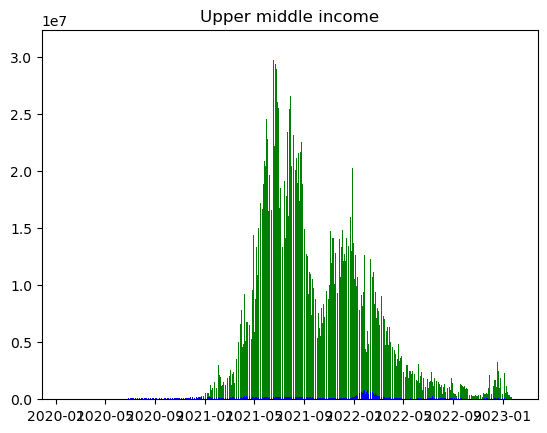

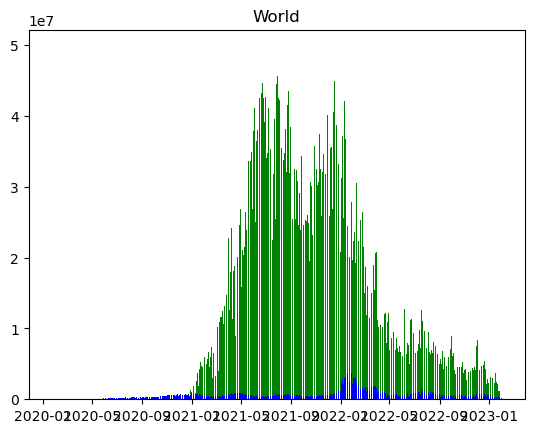

In [271]:
for i in locations:
    plt.bar(owid_clean[owid_clean['location'] == i]['date'], owid_clean[owid_clean['location'] == i]['new_vaccinations'], color='g', label='Vaccinated')
    plt.bar(owid_clean[owid_clean['location'] == i]['date'], owid_clean[owid_clean['location'] == i]['new_cases'], color='b', label='Cases')
    plt.bar(owid_clean[owid_clean['location'] == i]['date'], owid_clean[owid_clean['location'] == i]['new_deaths'], color='r', label='Deaths')

    plt.title(i)
    plt.show()

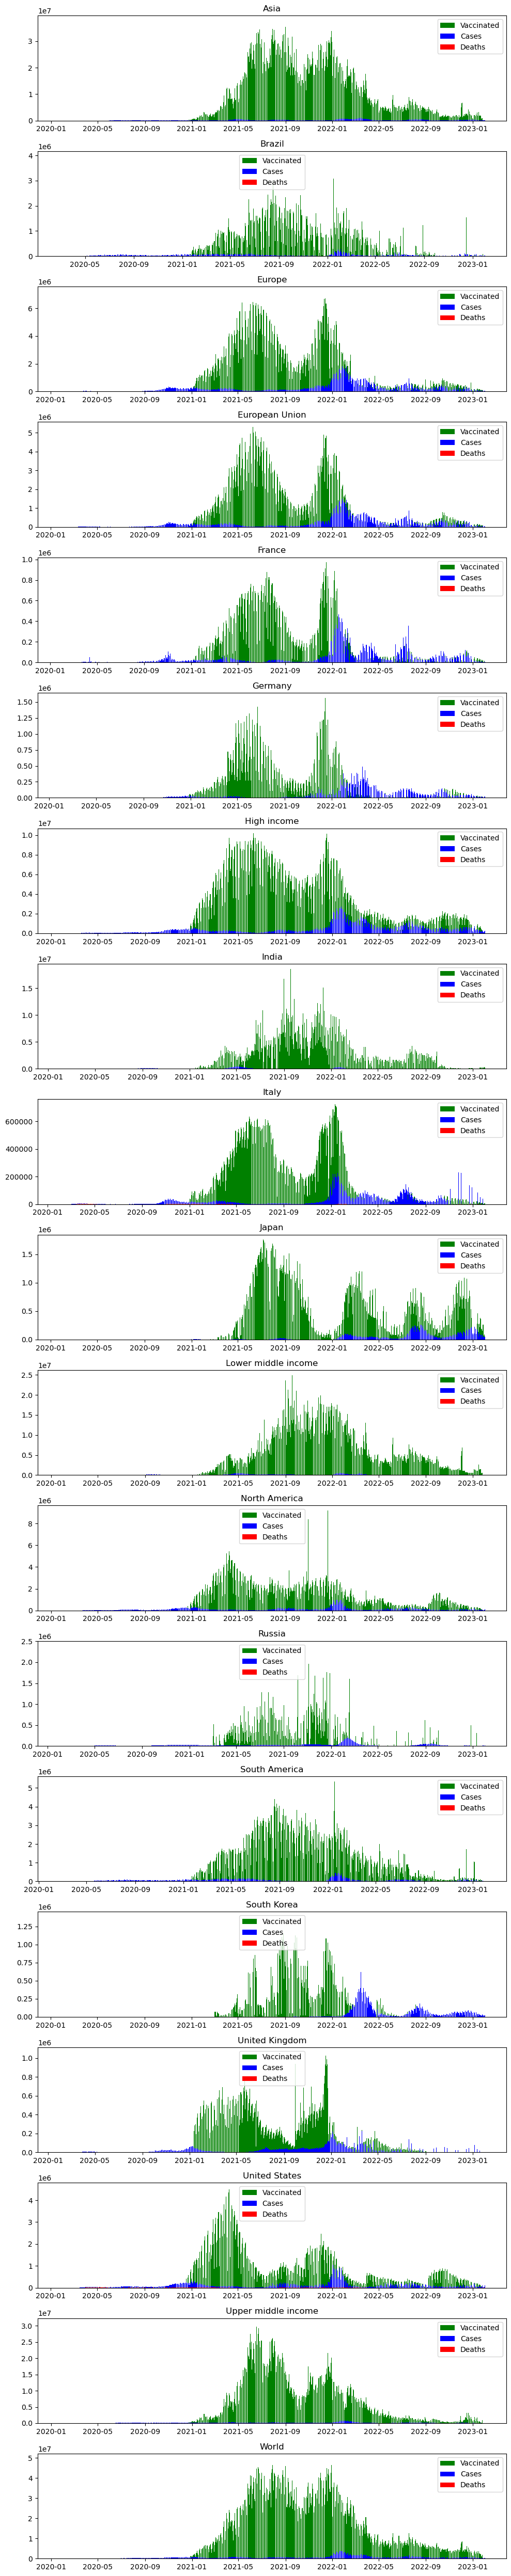

In [276]:
fig, axs = plt.subplots(len(locations), figsize=(10,50))
for i, ax in enumerate(axs):
    ax.bar(owid_clean[owid_clean['location'] == locations[i]]['date'], 
           owid_clean[owid_clean['location'] == locations[i]]['new_vaccinations'], 
           color='g', label='Vaccinated')
    ax.bar(owid_clean[owid_clean['location'] == locations[i]]['date'], 
           owid_clean[owid_clean['location'] == locations[i]]['new_cases'], 
           color='b', label='Cases')
    ax.bar(owid_clean[owid_clean['location'] == locations[i]]['date'], 
           owid_clean[owid_clean['location'] == locations[i]]['new_deaths'], 
           color='r', label='Deaths')

    ax.set_title(locations[i])
    ax.legend()

plt.tight_layout()
plt.show()


## Summary

The data analysis project was focused on analyzing and visualizing the effects of vaccines on covid cases. This was done by plotting bar charts of covid cases, vaccine administration, and deaths. The results of the analysis showed that on average, the introduction of the vaccine had a significant impact on reducing the spread of covid in EU and European countries. This was evident from the decline in the number of new cases, deaths and increase in vaccine administration.

However, South Korea was an exception to this trend, which could be due to missing data in recorded covid cases or other factors not covered by the data. The bar charts also showed an interesting pattern for Japan, where the vaccine was only introduced when covid cases started to peak. This could indicate that the vaccine played a role in controlling the spread of the virus in Japan.

The results of this data analysis project highlight the importance of vaccines in controlling the spread of covid. It provides a new perspective on the trend and patterns of covid cases and vaccine administration and provides valuable insights into the impact of vaccines on reducing the spread of the virus. To conclude, the vaccine plays a crucial role in controlling the spread of covid, and the results of this analysis provide evidence to support this claim.